In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [3]:
import sklearn

In [5]:
data = pd.read_csv(r"C:/Users/markp/OneDrive/Desktop/Datasets/dataset_sdn.csv")

In [6]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [7]:
data.shape

(104345, 23)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [10]:
data.label.unique()

array([0, 1], dtype=int64)

In [11]:
data.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

<Axes: ylabel='count'>

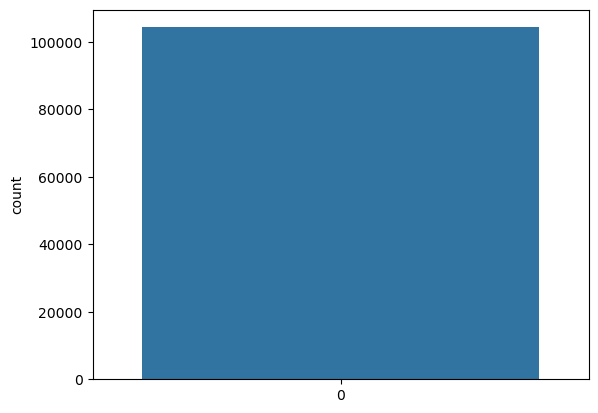

In [25]:
label_dict = dict(data.label.value_counts())
sns.countplot(data.label)

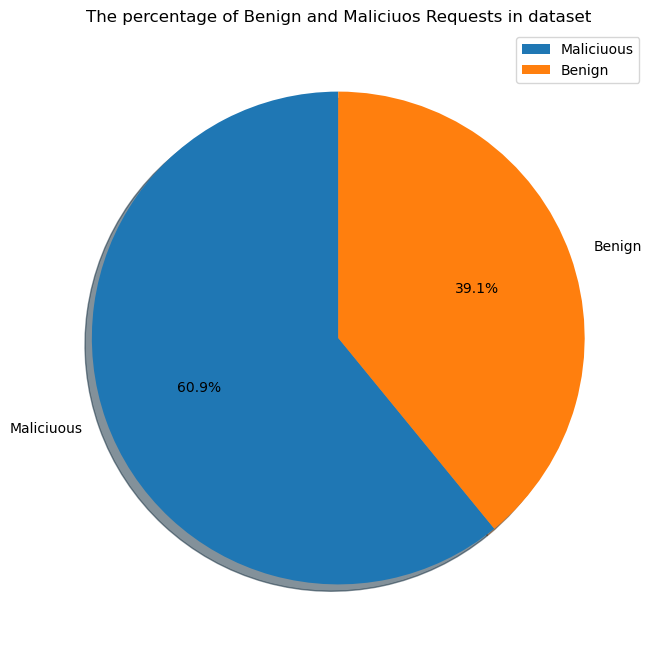

In [26]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [27]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features with NULL values')

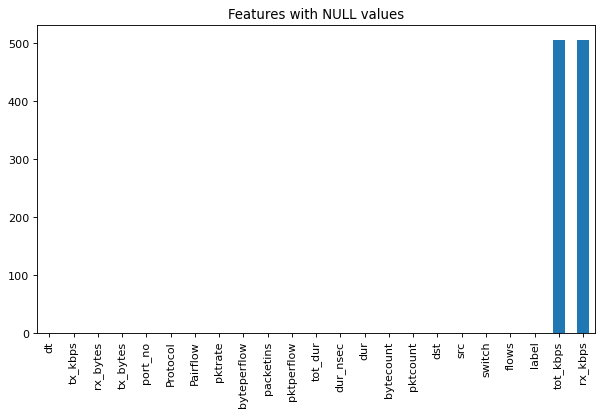

In [28]:
figure(figsize=(9,5),dpi = 80)
data[data.columns[data.isna().sum() >=0]].isna().sum().sort_values().plot.bar()
plt.title("Features with NULL values")

In [29]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [30]:
numeric_df = data.select_dtypes(include = ['int64','float64'])
object_df = data.select_dtypes(include = ['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns : ',numeric_cols)
print('Object Columns : ',object_cols)
print('Number of Numeric Features : ',len(numeric_cols))
print('Number of Object Features : ',len(object_cols))


Numeric Columns :  Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object')
Object Columns :  Index(['src', 'dst', 'Protocol'], dtype='object')
Number of Numeric Features :  20
Number of Object Features :  3


In [31]:
object_df.tail()

,src,dst,Protocol
104340,10.0.0.5,10.0.0.7,ICMP
104341,10.0.0.5,10.0.0.7,ICMP
104342,10.0.0.11,10.0.0.5,ICMP
104343,10.0.0.11,10.0.0.5,ICMP
104344,10.0.0.11,10.0.0.5,ICMP


In [32]:
numeric_df.tail()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,1,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,2,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,1,15209,12720,1,1.0,2.0,0
104344,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3,15099,14693,1,1.0,2.0,0


Text(0.5, 1.0, 'Number of all requests')

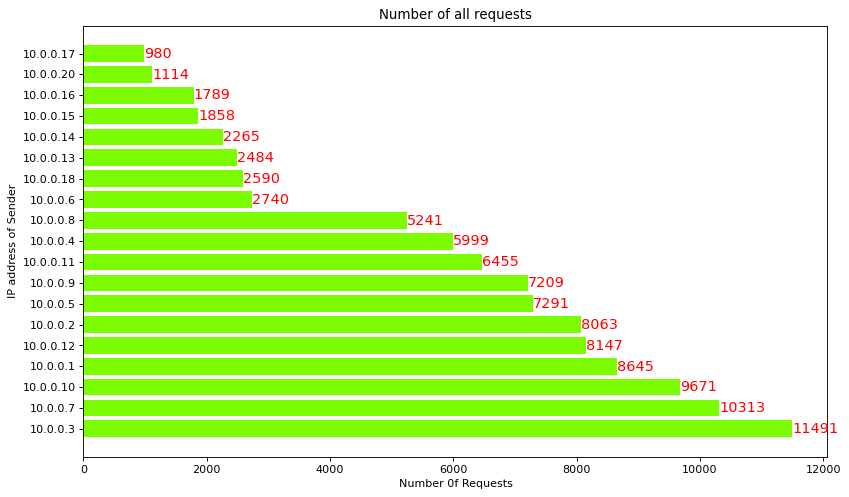

In [41]:
figure(figsize=(12,7),dpi = 80)
plt.barh(list(dict(data.src.value_counts()).keys())
         ,dict(data.src.value_counts()).values(),color = 'lawngreen')

for idx , val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val , y = idx-0.2 , s = str(val),color = 'r',size = 13)
    
plt.xlabel('Number 0f Requests')
plt.ylabel('IP address of Sender')
plt.title('Number of all requests')

Text(0.5, 1.0, 'Number of Attack requests')

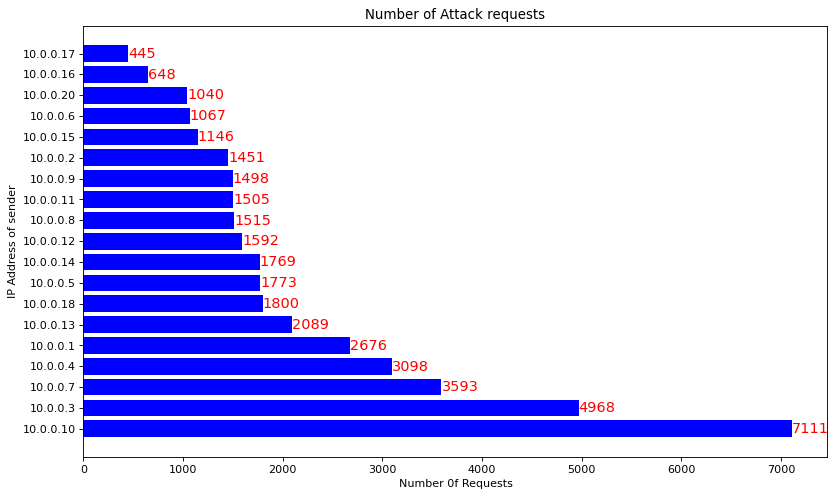

In [42]:
figure(figsize=(12,7),dpi = 80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys())
         ,dict(data[data.label == 1].src.value_counts()).values(),color = 'blue')

for idx,val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val,y = idx-0.2 , s = str(val) , color = 'r', size = 13)
    
plt.xlabel('Number 0f Requests')
plt.ylabel('IP Address of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP address')

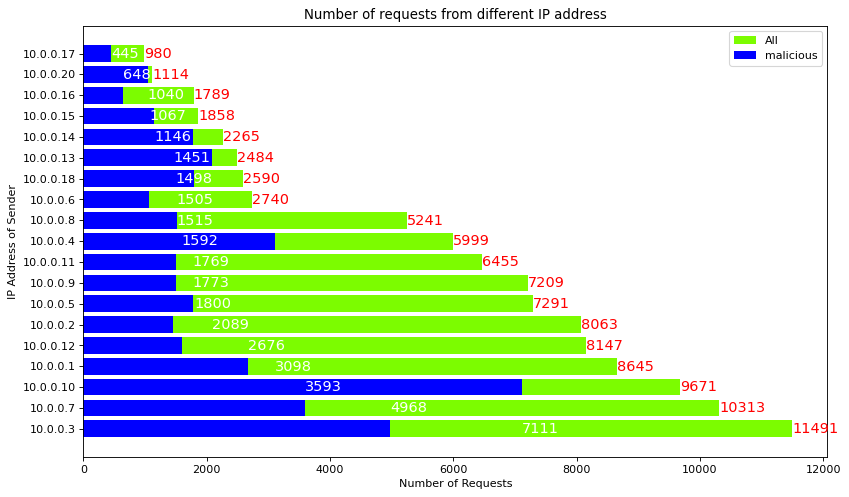

In [48]:
figure(figsize=(12,7) , dpi = 80)
plt.barh(list(dict(data.src.value_counts()).keys())
        ,dict(data.src.value_counts()).values(),color = 'lawngreen')

plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys())
         ,dict(data[data.label == 1].src.value_counts()).values(),color = 'blue')

for idx , val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val , y = idx - 0.2 , s = str(val) , color = 'r' , size = 13)

for idx,val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val , y = idx-0.2 , s = str(val) , color = 'w', size = 13)
    
plt.xlabel('Number of Requests')
plt.ylabel('IP Address of Sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP address')

Text(1.85, 14066, '13866')

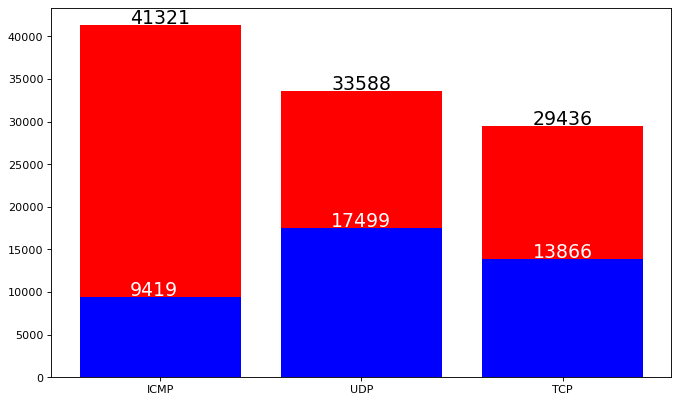

In [62]:
figure(figsize=(10,6),dpi = 80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()),
        dict(data.Protocol.value_counts()).values() , color = 'r')

plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys())
       ,dict(data[data.label == 1].Protocol.value_counts()).values(),color = 'b')

plt.text(x = 0-0.15,y = 41321+200,s = str(41321),color = 'black',size = 17)
plt.text(x = 1-0.15,y = 33588+200,s = str(33588),color = 'black',size = 17)
plt.text(x = 2-0.15,y = 29436+200,s = str(29436),color = 'black',size = 17)

plt.text(x = 0 - 0.15 , y = 9419+200, s = str(9419),color = 'w' , size =17)
plt.text(x = 1 - 0.15 , y = 17499+200, s = str(17499),color = 'w' , size =17)
plt.text(x = 2 - 0.15 , y = 13866+200, s = str(13866),color = 'w' , size =17)

In [64]:
df = data.copy()

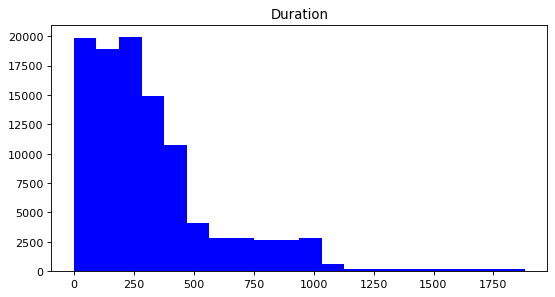

In [65]:
figure(figsize = (8,4) ,dpi = 80)
plt.hist(df.dur, bins = 20,color = 'b')
plt.title('Duration')
plt.show()

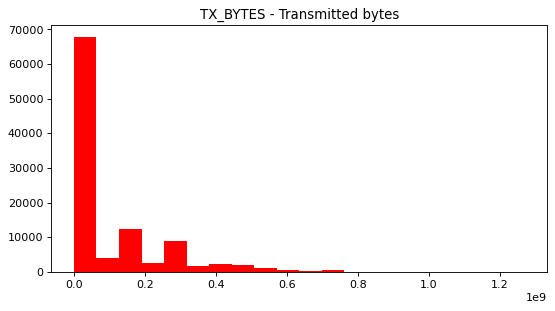

In [66]:
figure(figsize=(8,4),dpi = 80)
plt.hist(df.tx_bytes,bins = 20,color = 'r')
plt.title('TX_BYTES - Transmitted bytes')
plt.show()

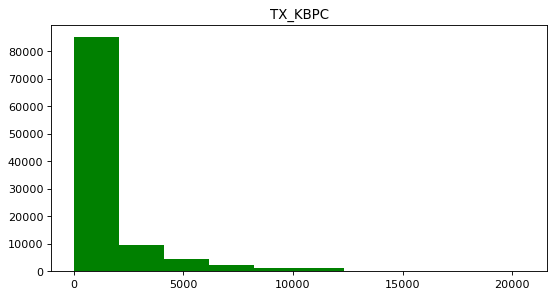

In [67]:
figure(figsize=(8,4),dpi = 80)
plt.hist(df.tx_kbps, bins = 10, color = 'g')
plt.title('TX_KBPC')
plt.show()

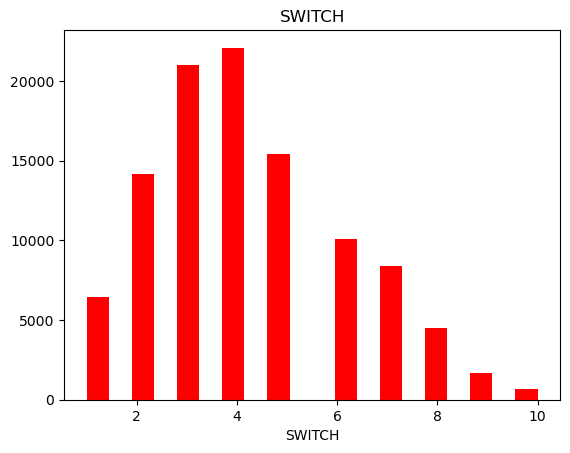

In [68]:
plt.hist(df.switch,bins=20,color ='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

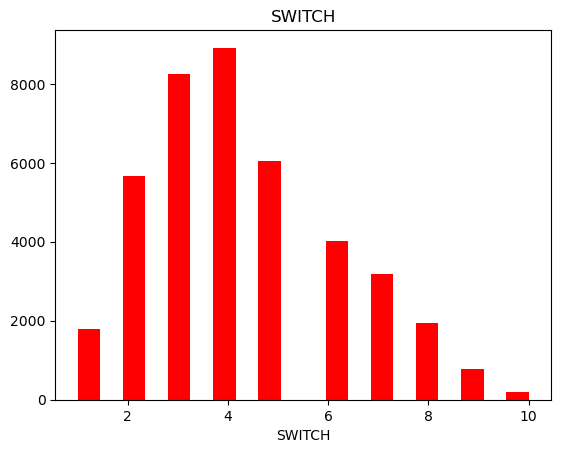

In [69]:
plt.hist(df[df['label'] == 1].switch , bins = 20,color= 'r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [86]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)  
    
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
            
            solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
            
df = data.copy()
df = df.dropna()
X = df.drop(['dt','src','dst','tot_dur','label'],axis = 1)
y = df.label     
X
X = pd.get_dummies(X)

In [87]:
M = Model(X)
lr = M.LogisticRegression()

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20032
           1       0.66      0.72      0.69     11120

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 3.168132781982422 seconds --- time for LogisticRegression
